In [44]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [45]:
# Import data dan concat
df_train = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv")
df_test = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv")
df = pd.concat([df_train,df_test],sort=True).reset_index(drop=True)
df_train.name = "Train Set"
df_test.name = "Test Set"
df.name = "All Set"

dfs = [df_train, df_test]
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [46]:
# Data Exploratory
print("Bentuk dataframe :",df.shape)
print("Bentuk data train :",df_train.shape)
print("Bentuk label pada data train :", df_train["Survived"].shape)
print("Bentuk data test :", df_test.shape)
print("Kolom pada dataframe :", df.columns)

Bentuk dataframe : (1309, 12)
Bentuk data train : (891, 12)
Bentuk label pada data train : (891,)
Bentuk data test : (418, 11)
Kolom pada dataframe : Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')


In [47]:
# Mengidentifikasi missing values
print("Info Dataset :")
print(df.info())
df.head(10)

Info Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [48]:
# Mengetahui korelasi antar fitur
print("Korelasi antar fitur dalam df :")
print(df.corr().abs().to_string())
print("\nKorelasi antar fitur dalam df_train :")
print(df_train.corr().abs().to_string())
print("\nKorelasi antar fitur dalam df_test :")
print(df_test.corr().abs().to_string())

Korelasi antar fitur dalam df :
                  Age      Fare     Parch  PassengerId    Pclass     SibSp  Survived
Age          1.000000  0.178740  0.150917     0.028814  0.408106  0.243699  0.077221
Fare         0.178740  1.000000  0.221539     0.031428  0.558629  0.160238  0.257307
Parch        0.150917  0.221539  1.000000     0.008942  0.018322  0.373587  0.081629
PassengerId  0.028814  0.031428  0.008942     1.000000  0.038354  0.055224  0.005007
Pclass       0.408106  0.558629  0.018322     0.038354  1.000000  0.060832  0.338481
SibSp        0.243699  0.160238  0.373587     0.055224  0.060832  1.000000  0.035322
Survived     0.077221  0.257307  0.081629     0.005007  0.338481  0.035322  1.000000

Korelasi antar fitur dalam df_train :
             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.2

C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\1601211338.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().abs().to_string())
C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\1601211338.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_train.corr().abs().to_string())
C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\1601211338.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_test.corr().abs().to_string())


In [49]:
# Mengidentifikasi Missing Values dari masing-masing kolom
def miss(df) :
    text = ""
    for col in df.columns.tolist() :
        a = "Kolom {} memiliki jumlah missing values : {}\n".format(col, df[col].isnull().sum())
        text += a
    return text
for i in dfs :
    print(i.name)
    print(miss(i))

Train Set
Kolom PassengerId memiliki jumlah missing values : 0
Kolom Survived memiliki jumlah missing values : 0
Kolom Pclass memiliki jumlah missing values : 0
Kolom Name memiliki jumlah missing values : 0
Kolom Sex memiliki jumlah missing values : 0
Kolom Age memiliki jumlah missing values : 177
Kolom SibSp memiliki jumlah missing values : 0
Kolom Parch memiliki jumlah missing values : 0
Kolom Ticket memiliki jumlah missing values : 0
Kolom Fare memiliki jumlah missing values : 0
Kolom Cabin memiliki jumlah missing values : 687
Kolom Embarked memiliki jumlah missing values : 2

Test Set
Kolom PassengerId memiliki jumlah missing values : 0
Kolom Pclass memiliki jumlah missing values : 0
Kolom Name memiliki jumlah missing values : 0
Kolom Sex memiliki jumlah missing values : 0
Kolom Age memiliki jumlah missing values : 86
Kolom SibSp memiliki jumlah missing values : 0
Kolom Parch memiliki jumlah missing values : 0
Kolom Ticket memiliki jumlah missing values : 0
Kolom Fare memiliki juml

In [50]:
# Mengisi nilai Missing Values dengan menggunakan Median
df_PS = df.groupby(["Pclass","Sex"])["Age"].median()
for i in range(1,4) :
    for sex in ["female","male"] :
        print("Median dari Pclass {} {} : {}".format(i,sex,df_PS[i][sex]))
df["Age"] = df.groupby(["Pclass","Sex"],group_keys=False)["Age"].apply(lambda x : x.fillna(x.median()))
print(df["Age"].shape)

Median dari Pclass 1 female : 36.0
Median dari Pclass 1 male : 42.0
Median dari Pclass 2 female : 28.0
Median dari Pclass 2 male : 29.5
Median dari Pclass 3 female : 22.0
Median dari Pclass 3 male : 25.0
(1309,)


In [51]:
# Mengisi nilai Missing Values lainnya
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"] = df.groupby(["Pclass","SibSp","Parch"],group_keys=False)["Fare"].apply(lambda x : x.fillna(x.median()))

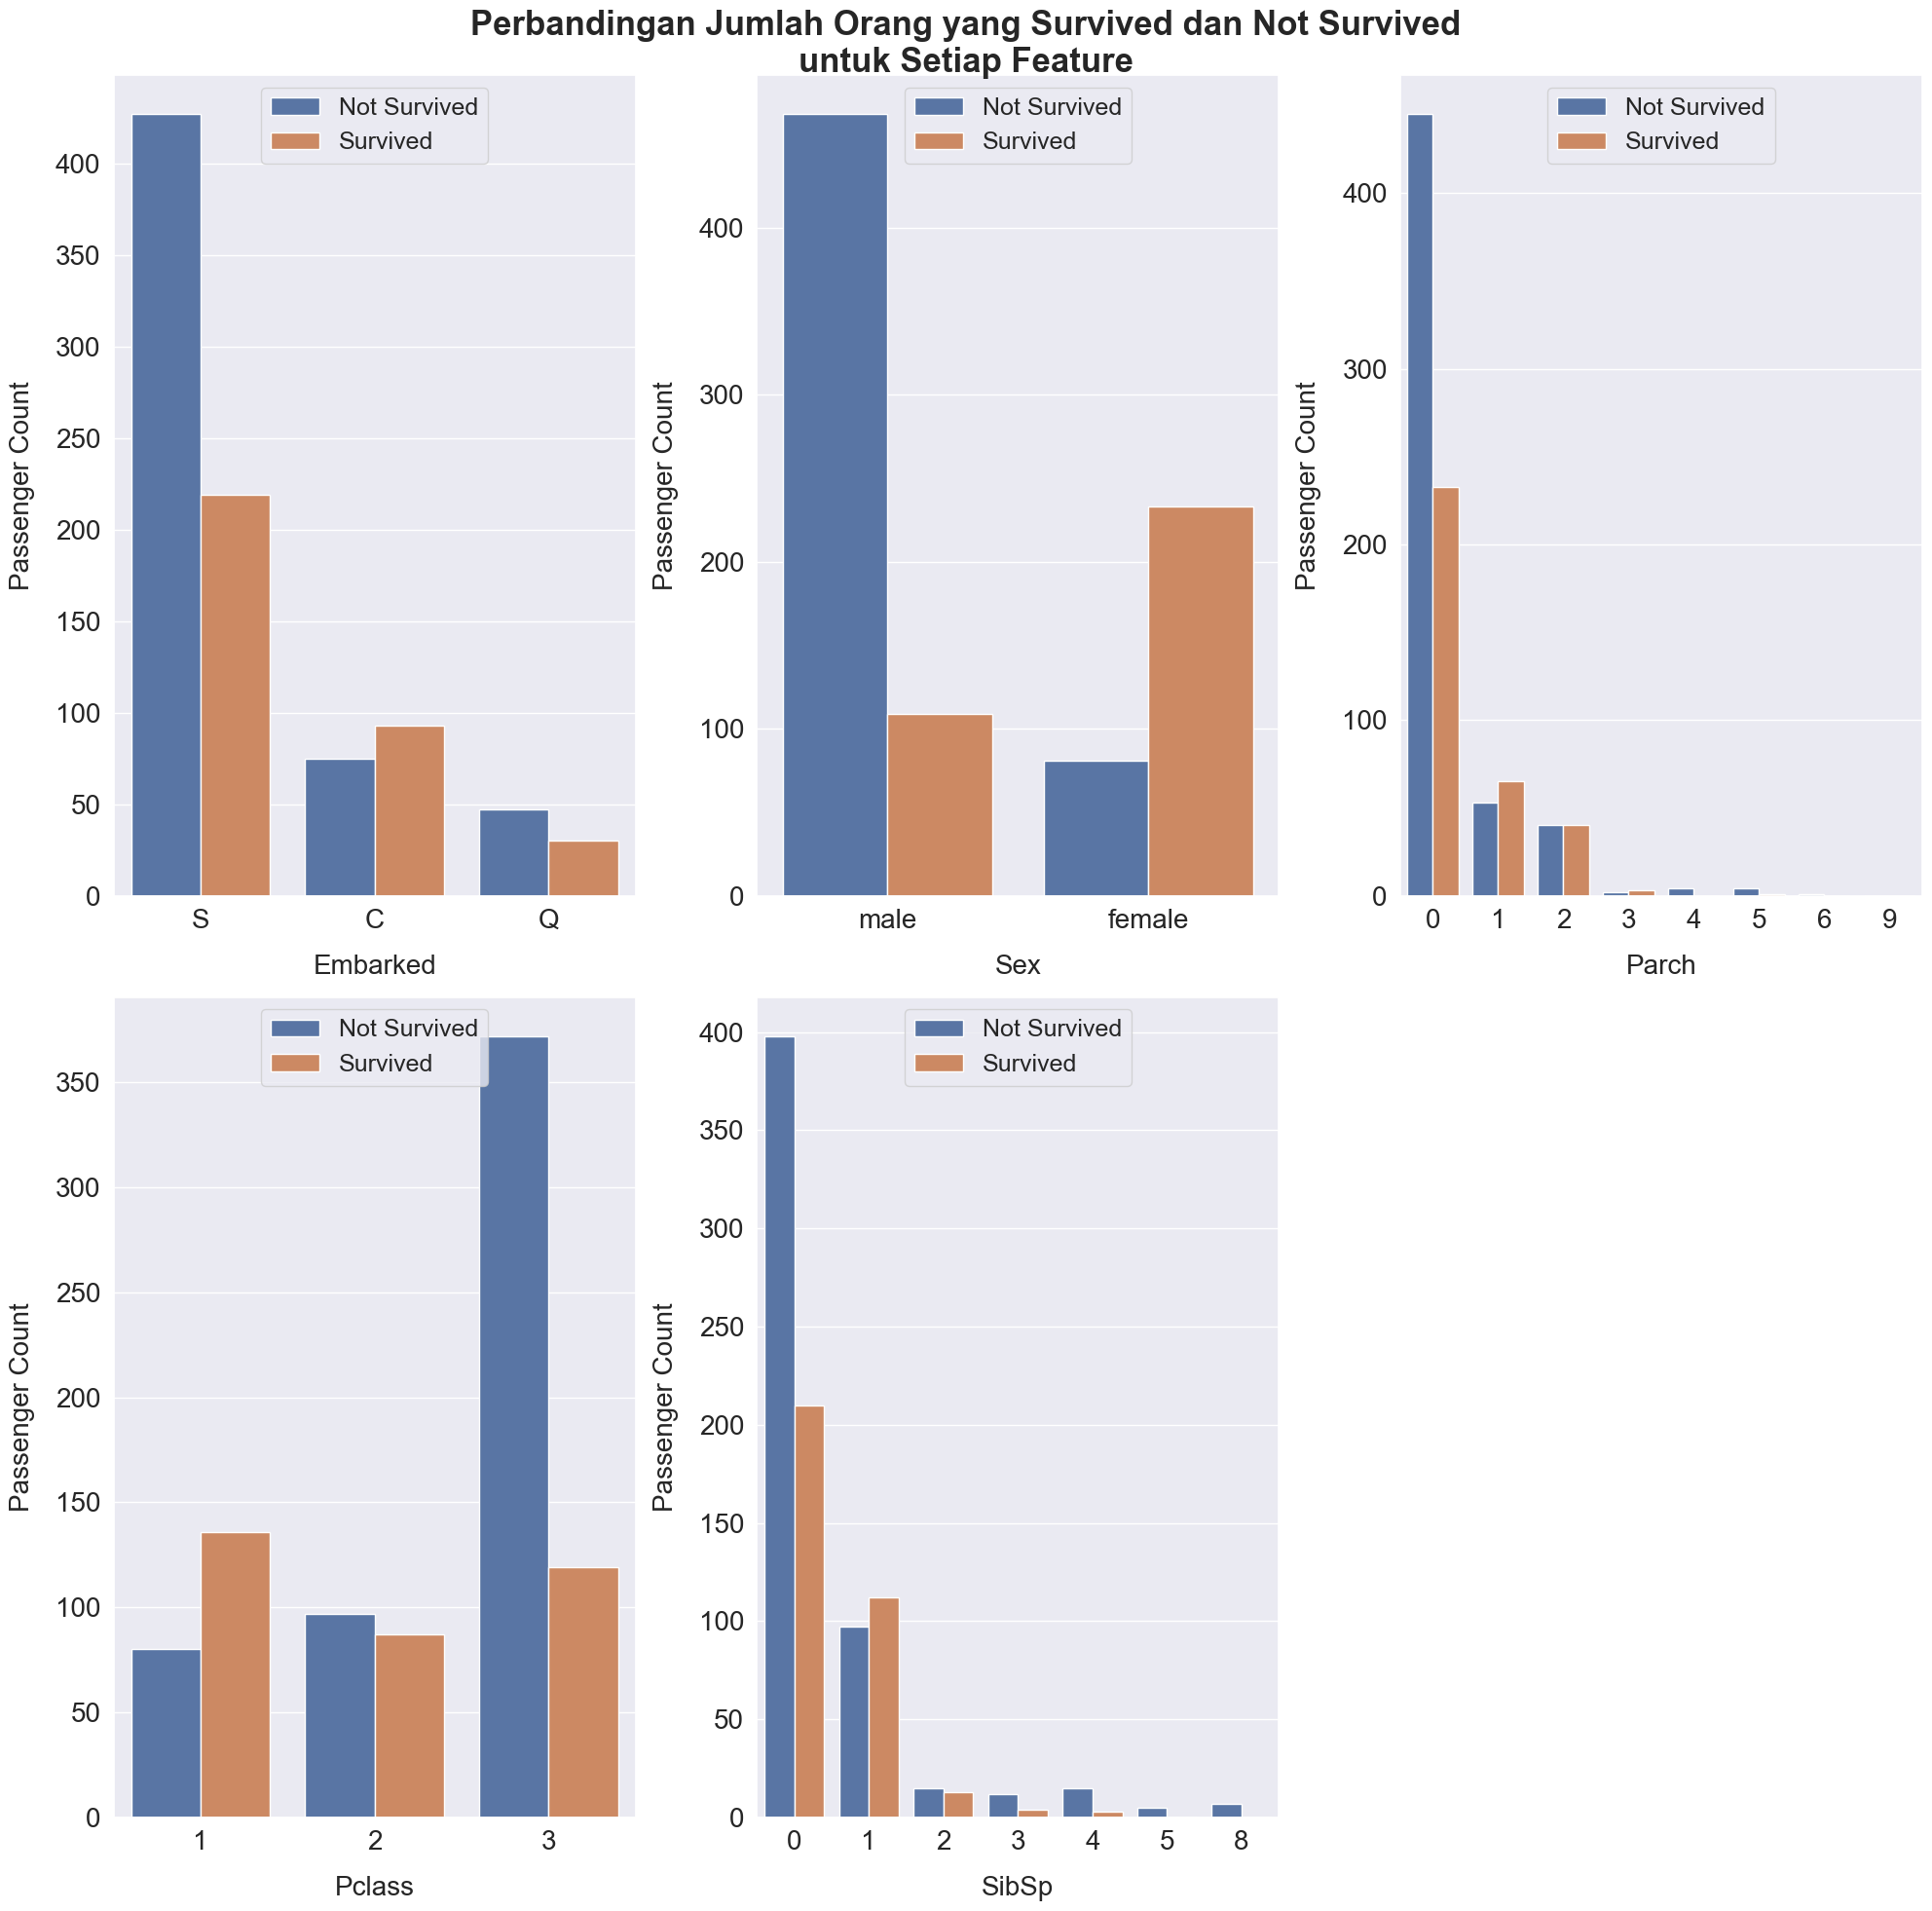

In [52]:
# Exploring Data
import matplotlib.pyplot as plt
features = ["Embarked","Sex","Parch","Pclass","SibSp"]
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
for i, feature in enumerate(features,1) :
    plt.subplot(2,3,i)
    sns.countplot(x=feature,data=df,hue="Survived")
    plt.xlabel("{}".format(feature),size=20,labelpad=15)
    plt.ylabel("Passenger Count",size=20,labelpad=15)
    plt.tick_params(axis='x',labelsize=20)
    plt.tick_params(axis='y',labelsize=20)
    
    plt.legend(["Not Survived","Survived"],loc='upper center',prop={"size":18})
plt.suptitle("Perbandingan Jumlah Orang yang Survived dan Not Survived\nuntuk Setiap Feature",size=25,weight="bold")
plt.tight_layout()
plt.show()

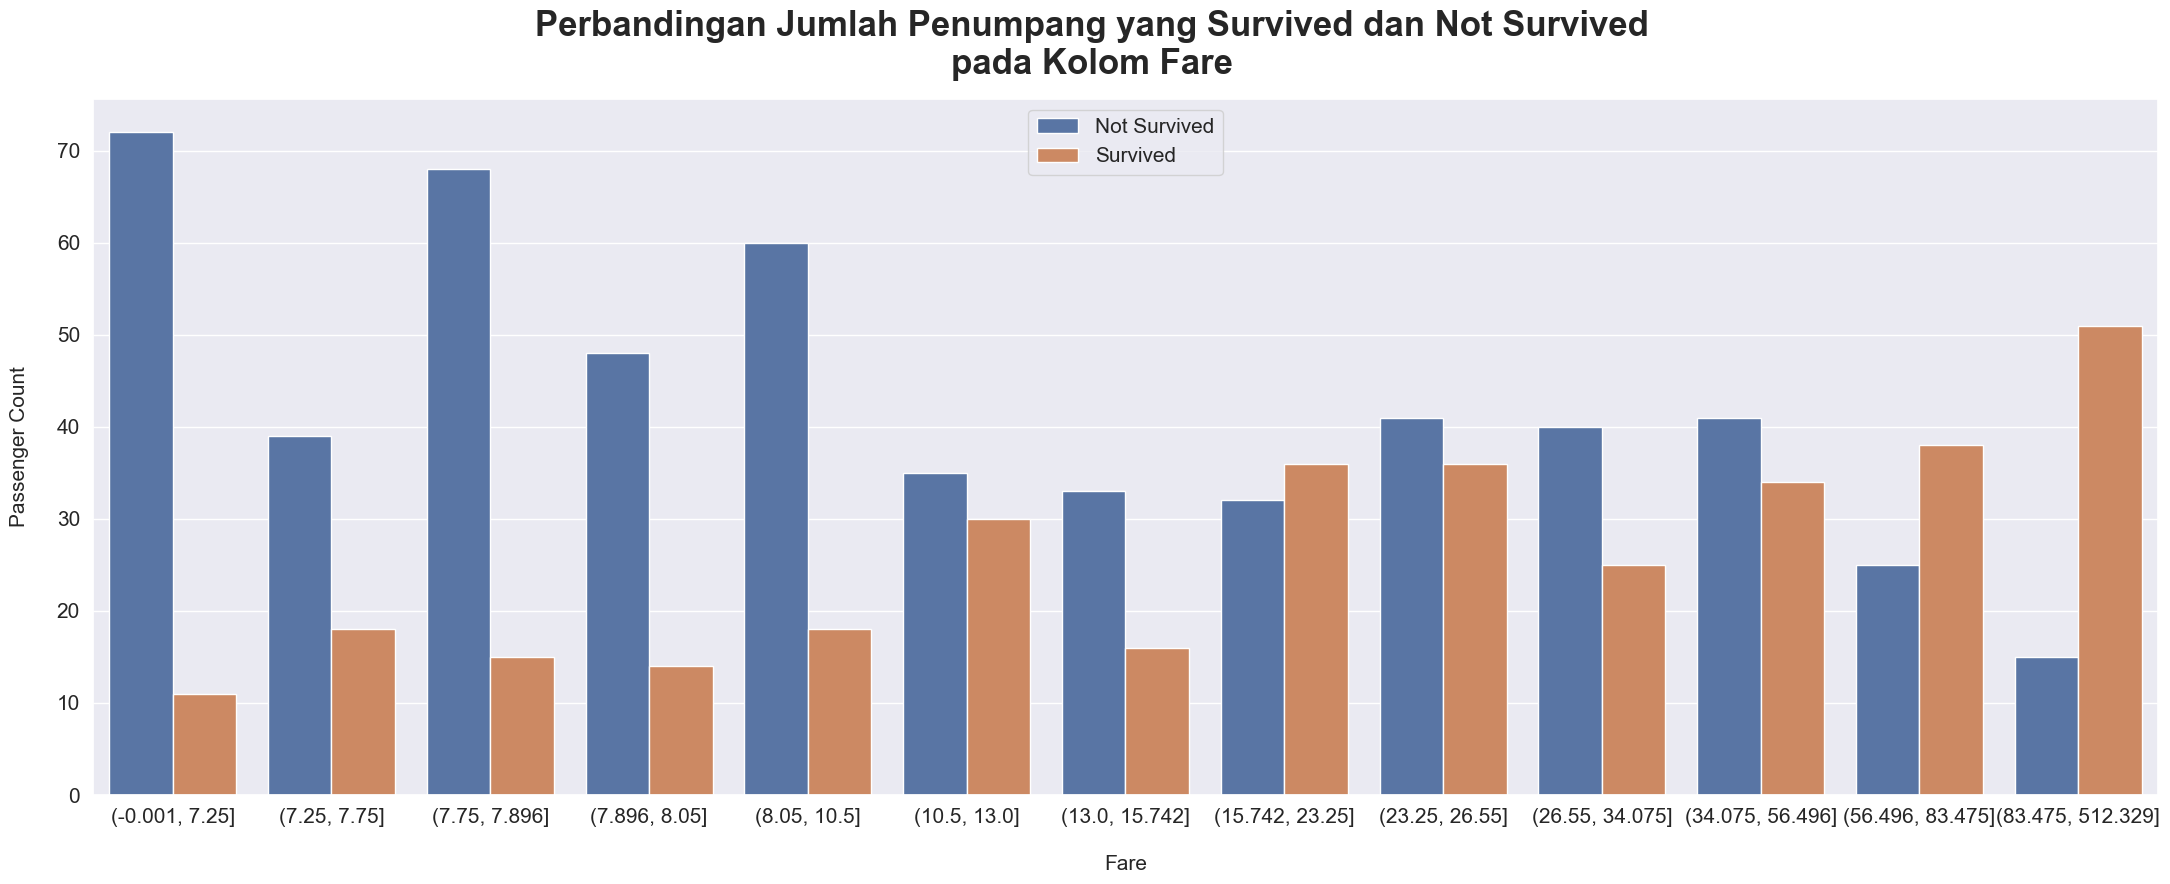

In [53]:
# Exploring Data 2 : Fare
df["Fare"] = pd.qcut(df["Fare"],13)

fig, ax = plt.subplots(figsize=(22,9))
sns.countplot(data=df,x="Fare",hue='Survived')
plt.xlabel("Fare",size=15,labelpad=20)
plt.ylabel("Passenger Count",size=15,labelpad=20)
plt.tick_params(axis='x',labelsize=15)
plt.tick_params(axis='y',labelsize=15)
plt.legend(["Not Survived","Survived"],loc="upper center",prop={'size':15})
plt.suptitle("Perbandingan Jumlah Penumpang yang Survived dan Not Survived\npada Kolom Fare",size=25,weight='bold')
plt.tight_layout()
plt.show()

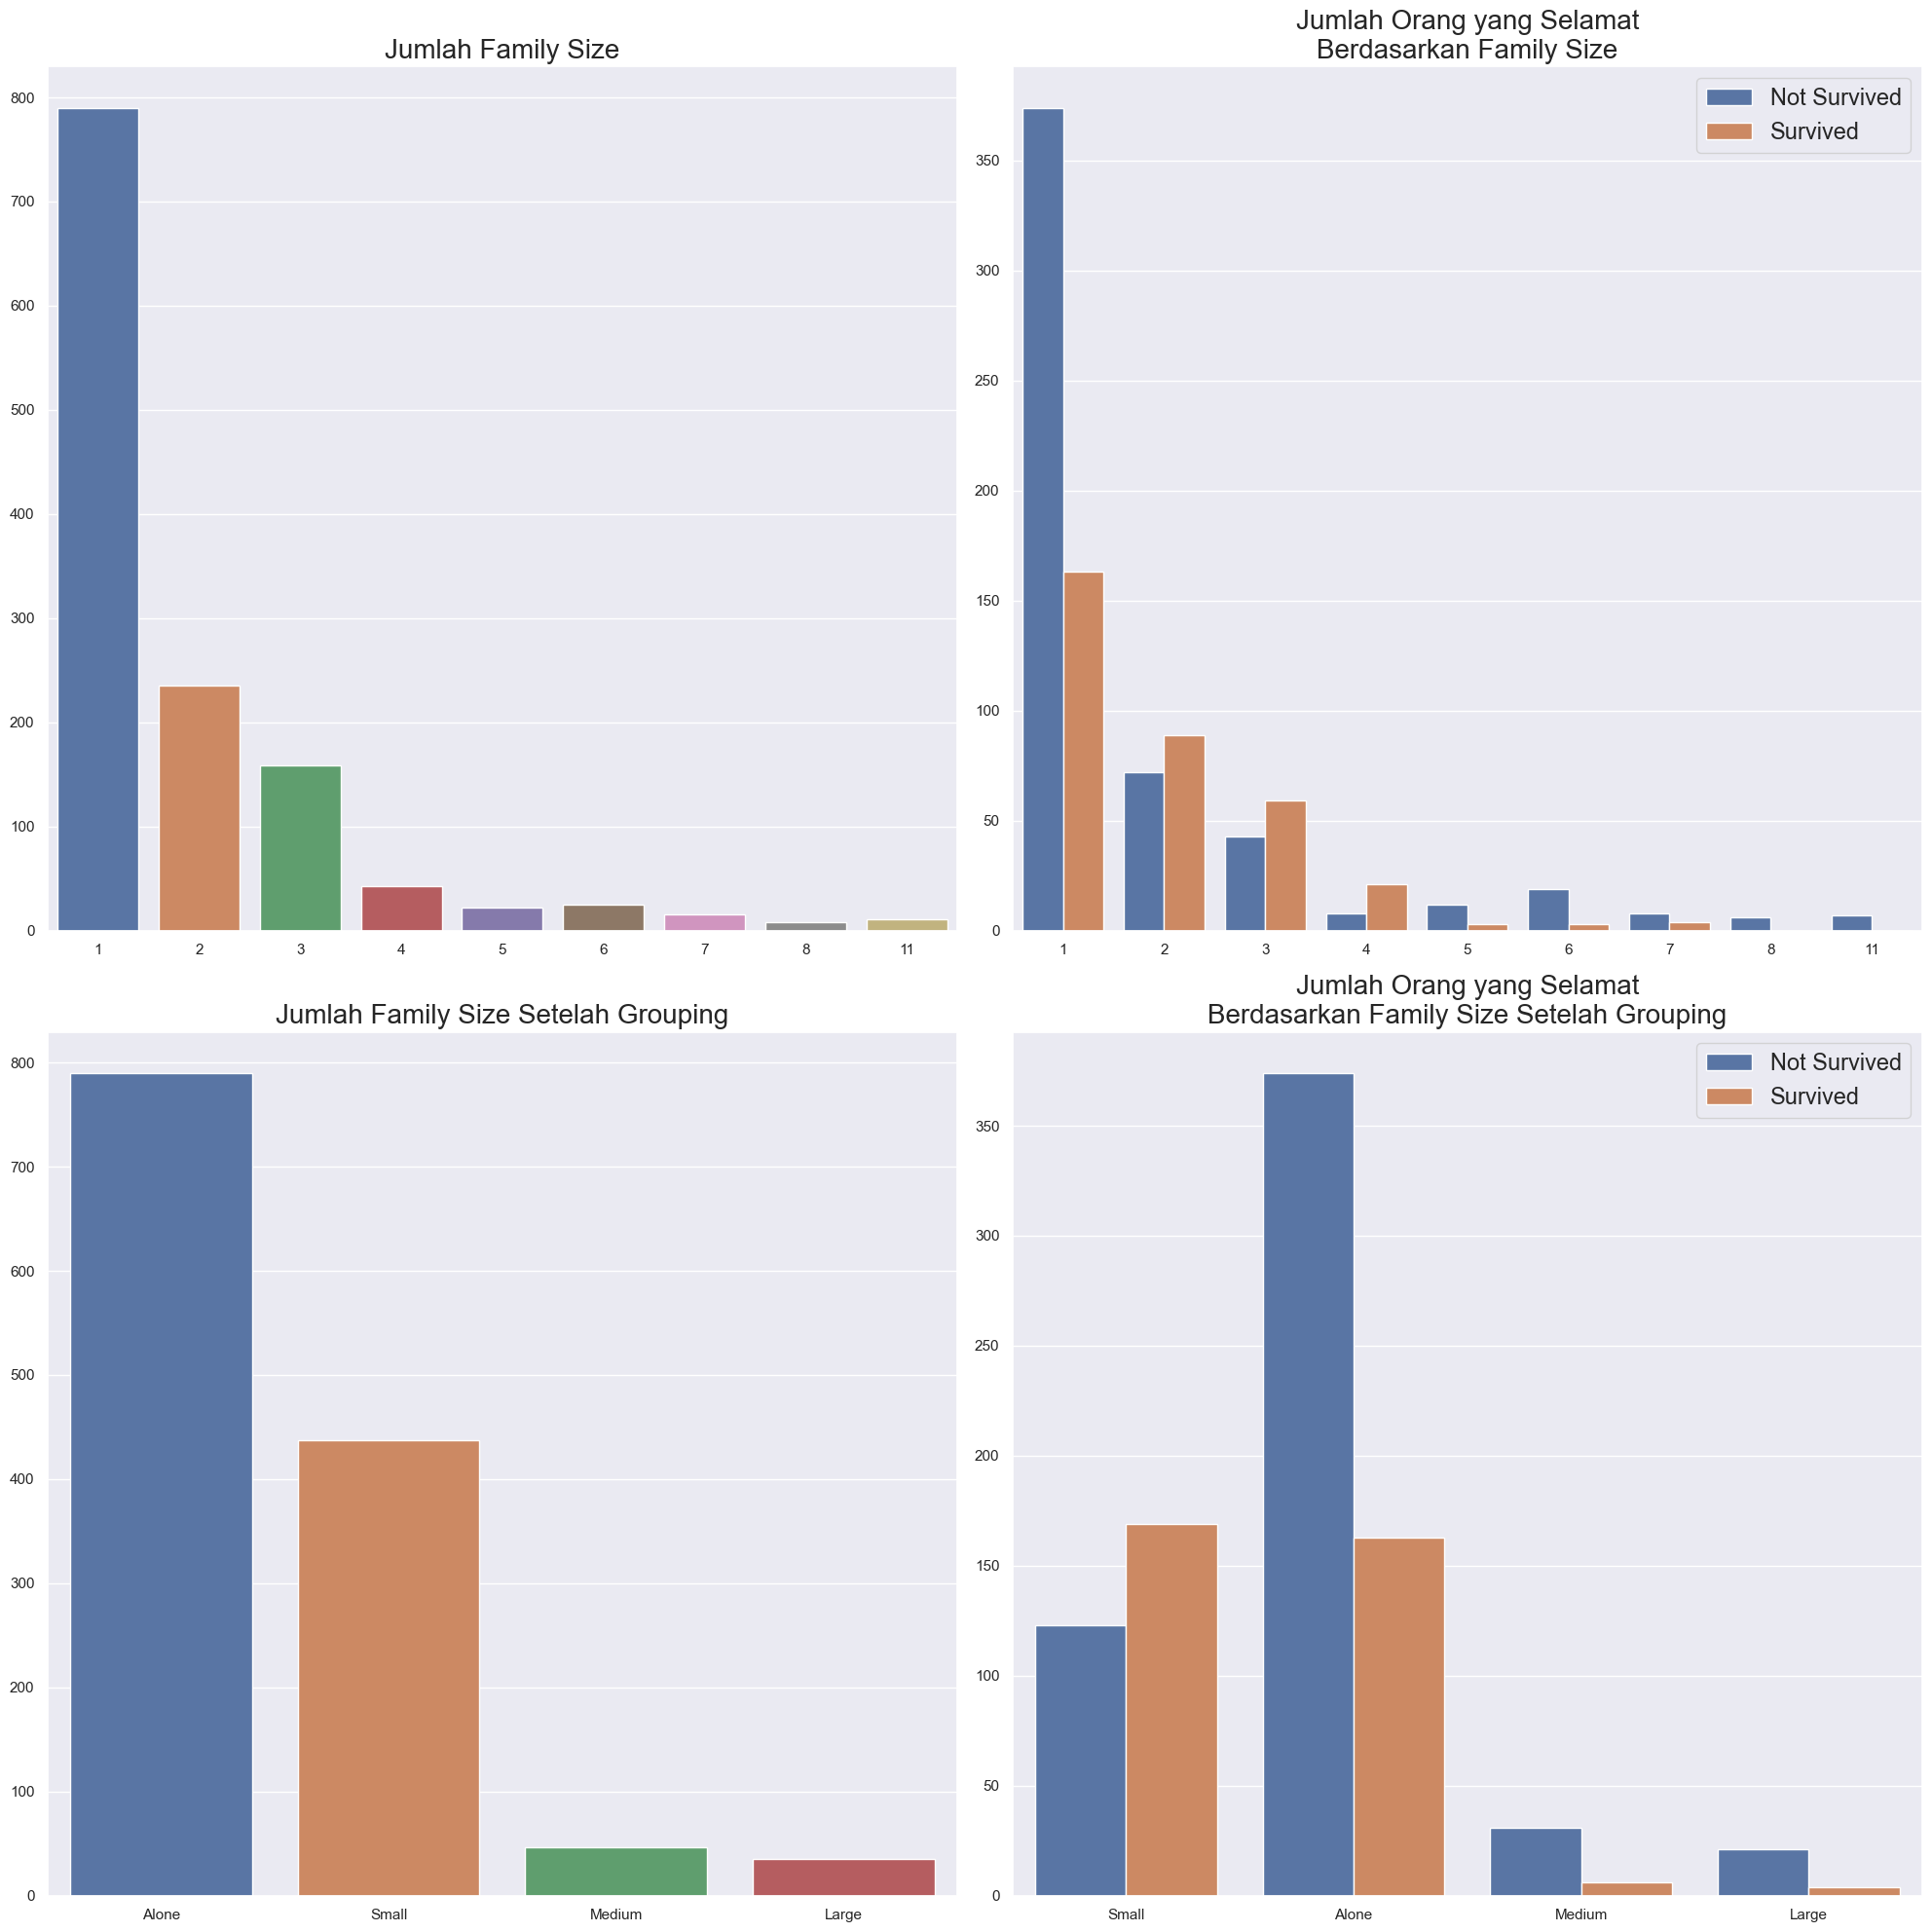

In [54]:
# Feature Engineering : Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
fig, ax = plt.subplots(2,2,figsize=(20,20))
sns.barplot(x=df["FamilySize"].value_counts().index,y=df['FamilySize'].value_counts().values,ax=ax[0][0])
sns.countplot(x="FamilySize",data=df,hue="Survived",ax=ax[0][1])
def fmap(x) :
    if x==1 :
        return "Alone"
    elif x>1 and x<=4 :
        return 'Small'
    elif x==5 or x==6 :
        return "Medium"
    else :
        return "Large"
df["FamilyGroup"] = df["FamilySize"].apply(fmap)
sns.barplot(x=df["FamilyGroup"].value_counts().index,y=df['FamilyGroup'].value_counts().values,ax=ax[1][0])
sns.countplot(x="FamilyGroup",data=df,hue="Survived",ax=ax[1][1])
a = ""
for i in range(2) :
    ax[i][1].legend(['Not Survived','Survived'],prop={"size":17})
    ax[i][0].set_title("Jumlah Family Size"+a,size=20)
    ax[i][1].set_title("Jumlah Orang yang Selamat\nBerdasarkan Family Size"+a,size=20)
    a = " Setelah Grouping"
    for j in range(2) :
        ax[i][j].set_xlabel("")
        ax[i][j].set_ylabel("")
plt.tight_layout()
plt.show()

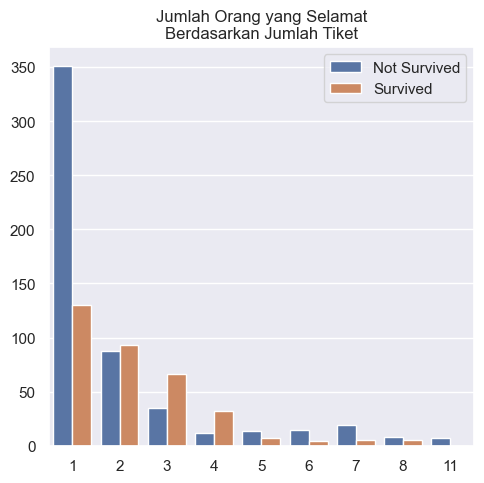

In [55]:
# Feature Engineering : Membuat kolom Ticket_Frequency
df["Ticket_Frequency"] = df.groupby("Ticket")["Ticket"].transform('count')
plt.subplots(figsize=(5,5))
sns.countplot(x="Ticket_Frequency",hue="Survived",data=df)
plt.legend(["Not Survived", "Survived"])
plt.xlabel("")
plt.ylabel("")
plt.title("Jumlah Orang yang Selamat\nBerdasarkan Jumlah Tiket")
plt.tight_layout()
plt.show()

In [56]:
# Feature Engineering : Membuat Kolom Title dan Is_Married
df["Title"] = df["Name"].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
df["Is_Married"] = 0
df["Is_Married"].loc[df["Title"]=="Mrs"] = 1
print(df["Is_Married"].unique())
print(df["Title"].unique())

[0 1]
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\1607503798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Is_Married"].loc[df["Title"]=="Mrs"] = 1


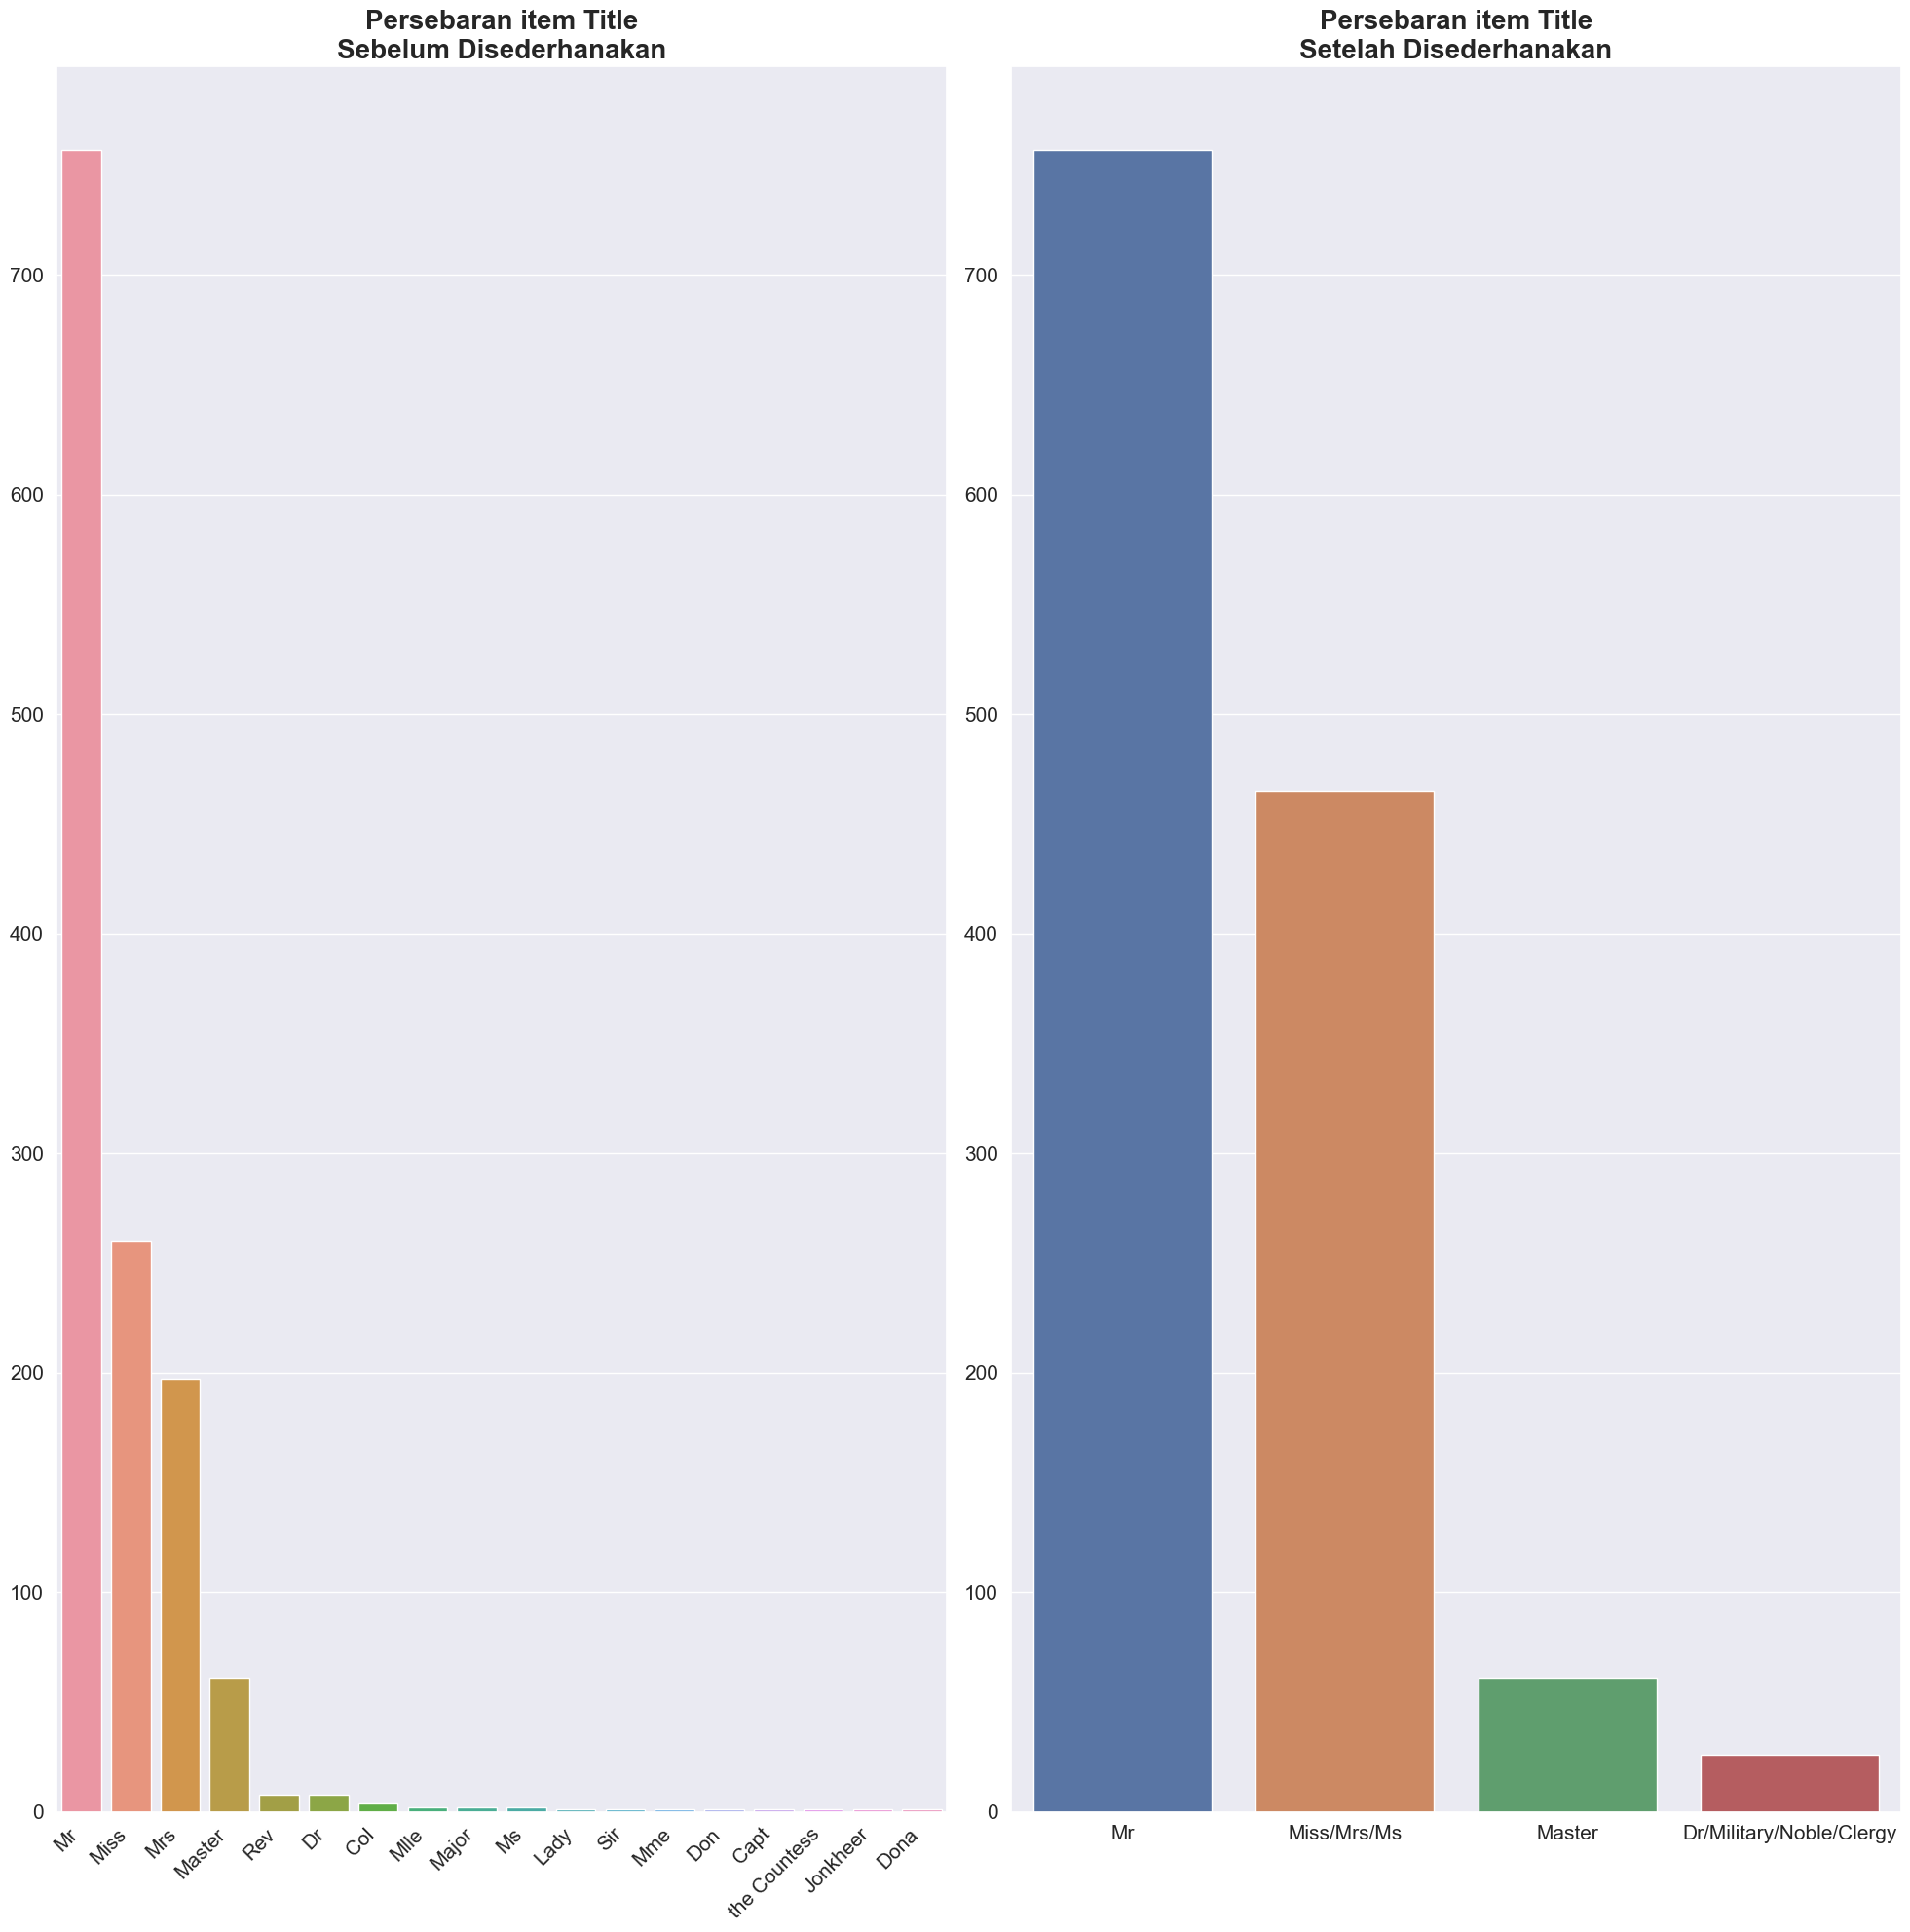

In [57]:
# Feature Engineering : Mengganti isi kolom Title menjadi lebih ringkas
fig, axs = plt.subplots(1,2,figsize=(20,20))
sns.barplot(x=df["Title"].value_counts().index, y=df["Title"].value_counts().values,ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=45,ha="right")
axs[0].set_title("Persebaran item Title\nSebelum Disederhanakan",size=20,weight="bold")
df["Title"] = df["Title"].replace(["Miss","Mrs","Mlle","Lady","Ms","Mme","the Countess","Dona"],"Miss/Mrs/Ms")
df["Title"] = df["Title"].replace(["Rev","Dr","Col","Major","Sir","Don","Capt","Jonkheer"],"Dr/Military/Noble/Clergy")
sns.barplot(x=df["Title"].value_counts().index, y=df["Title"].value_counts().values,ax=axs[1])
axs[1].set_title("Persebaran item Title\nSetelah Disederhanakan",size=20,weight="bold")
for i in range(2) :
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)
    
plt.tight_layout()
plt.show()

In [58]:
# Final Check : Lihat apa saja yang telah berubah dari data kita secara sekilas
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,FamilyGroup,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


In [60]:
# Modelling : Membuat data train dan data test (this still works even there are many warnings)
df_train = df[:890]
df_test = df[890:]
dfs = [df_train,df_test]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'FamilyGroup', 'Age', 'Fare']
for dfr in dfs :
    for feature in non_numeric_features :
        dfr[feature] = LabelEncoder().fit_transform(dfr[feature])
    
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'FamilyGroup']
encoded_features = []
for dfr in dfs :
    for feature in cat_features :
        encoded_feat = OneHotEncoder().fit_transform(dfr[feature].values.reshape(-1,1)).toarray()
        n = dfr[feature].nunique()
        cols = ["{}_{}".format(feature,i) for i in range(1,n+1)]
        encoded_df = pd.DataFrame(encoded_feat,columns=cols)
        encoded_df.index = dfr.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train,*encoded_features[:5]],axis=1)
df_test = pd.concat([df_test,*encoded_features[5:]],axis=1)

C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\2459277249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr[feature] = LabelEncoder().fit_transform(dfr[feature])
C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\2459277249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr[feature] = LabelEncoder().fit_transform(dfr[feature])
C:\Users\zulfi\AppData\Local\Temp\ipykernel_14280\2459277249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [63]:
# Modelling : Drop Kolom yang tidak diperlukan
df = pd.concat([df_train,df_test],sort=True).reset_index(drop=True)

drop_cols = ['Cabin', 'Embarked', 'FamilySize', 'FamilyGroup', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']
df.drop(columns=drop_cols,inplace=True)
df

,Age,Embarked_1,Embarked_2,Embarked_3,FamilyGroup_1,FamilyGroup_2,FamilyGroup_3,FamilyGroup_4,Fare,Is_Married,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,52,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,34,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,48,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,48,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,31,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0
1305,52,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12,0,...,0.0,0.0,1.0,0.0,0,3,0.0,0.0,1.0,0.0
1306,51,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0
1307,31,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


In [72]:
# Modelling : Membuat X dan Y train test
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols+["Survived"]))
y_train = df_train["Survived"].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols+["Survived"]))

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)

X_train shape : (890, 22)
y_train shape : (890,)
X_test shape : (419, 22)


In [77]:
# Modelling : Fitting data dengan model Random Forest dan evaluasi
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="gini",
                              max_depth=5,
                              n_estimators=1100,
                              min_samples_leaf=5,
                              min_samples_split=4,
                              oob_score=True,
                              random_state= 50)
model.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('Score :',score)
print("Mean :",score.mean())
print("Standard Deviation :",score.std())

Score : [0.84269663 0.86516854 0.78651685 0.86516854 0.84269663 0.80898876
 0.83146067 0.78651685 0.86516854 0.85393258]
Mean : 0.8348314606741573
Standard Deviation : 0.029321322136404232


In [83]:
# Modelling : Modelling tanpa melalui proses feature engineering
df = pd.concat([df_train,df_test],sort=True).reset_index(drop=True)
drop_cols = ['Cabin', 'Embarked', 'FamilySize', 'FamilyGroup', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'FamilyGroup_1', 'FamilyGroup_2', 'FamilyGroup_3', 'FamilyGroup_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']
df.drop(columns=drop_cols,inplace=True)

X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols+["Survived"]))
y_train = df_train["Survived"].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols+["Survived"]))

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)

X_train shape : (890, 12)
y_train shape : (890,)
X_test shape : (419, 12)


In [84]:
# Modelling : Fitting model dengan data tanpa feature engineering
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="gini",
                              max_depth=5,
                              n_estimators=1100,
                              min_samples_leaf=5,
                              min_samples_split=4,
                              oob_score=True,
                              random_state= 50)
model.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('Score :',score)
print("Mean :",score.mean())
print("Standard Deviation :",score.std())

Score : [0.79775281 0.83146067 0.7752809  0.87640449 0.84269663 0.80898876
 0.80898876 0.7752809  0.85393258 0.80898876]
Mean : 0.8179775280898877
Standard Deviation : 0.031299748937492405


Sumber Belajar : www.dqlab.id